### Brazilian E-Commerce Public Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Data Schema

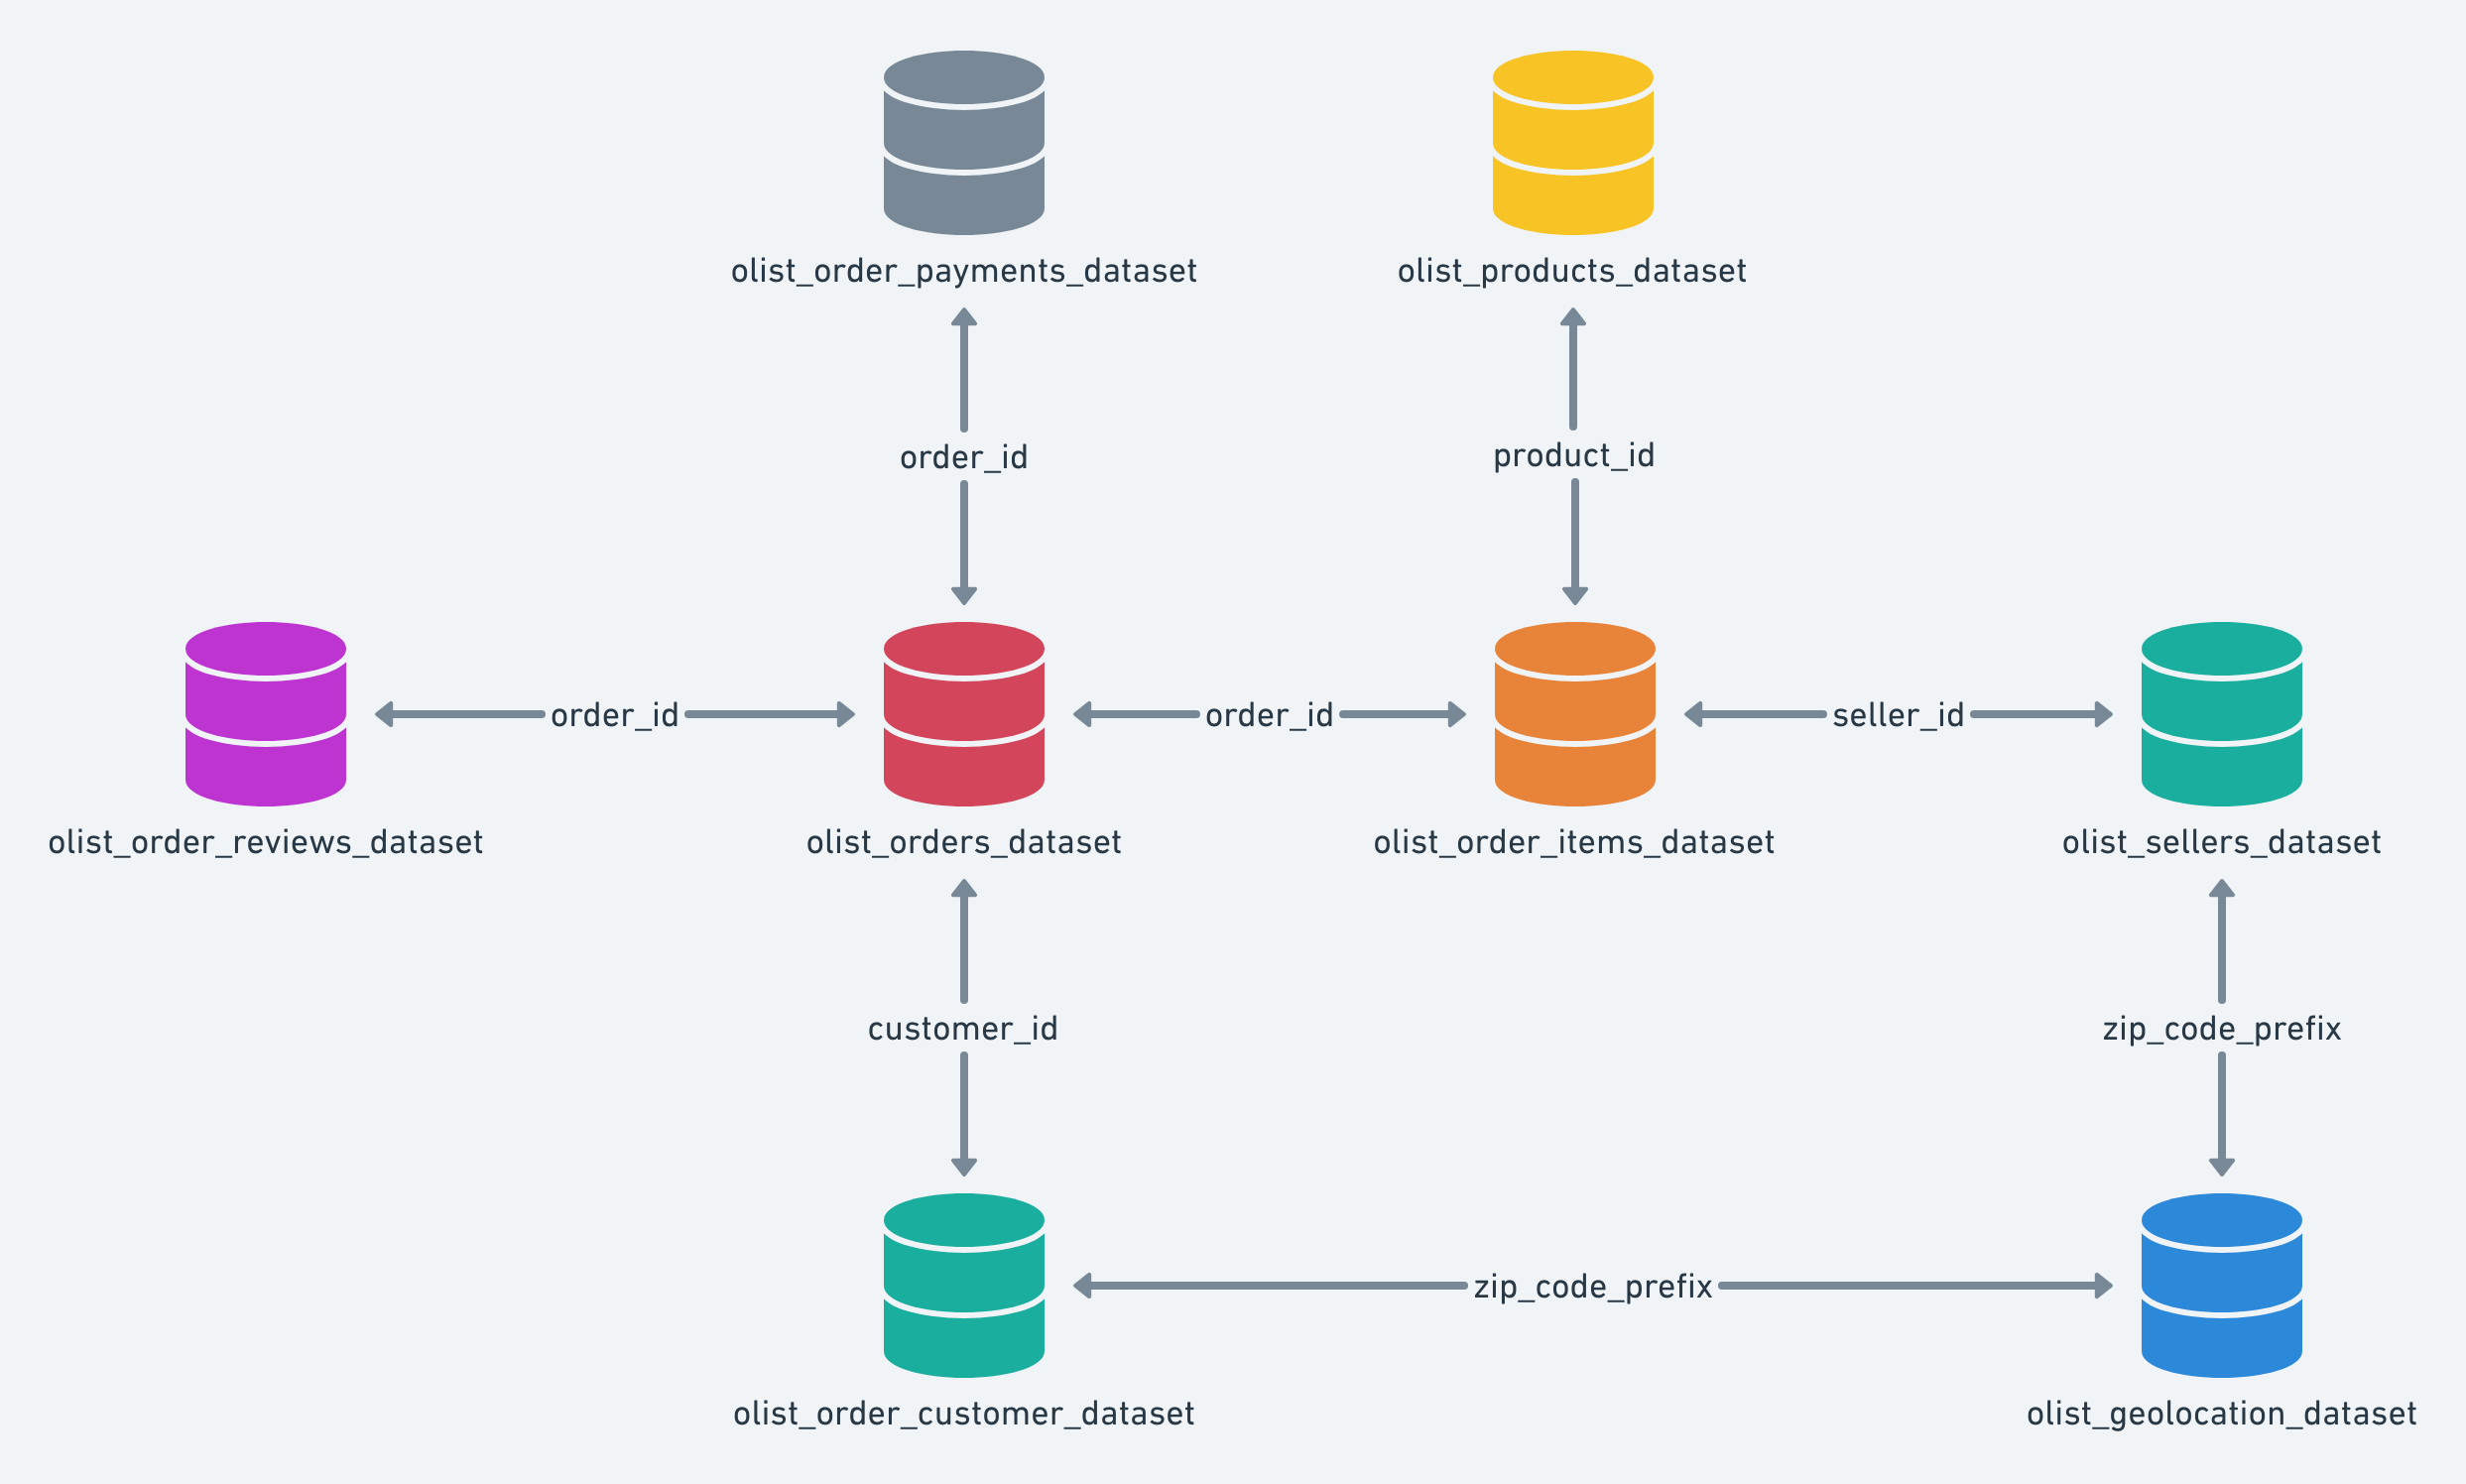

In [1]:
from PIL import Image
img = Image.open('HRhd2Y0.png')
img

**The task is to perform RFM Analysis.**

**olist_orders_dataset.csv** and **olist_order_payments_dataset.csv** should be used

order_delivered_carrier_date - should be used in this task

Since the dataset is not actual by 2021, thus we should assume that we were asked to perform RFM analysis the day after the last record

### Importing Required Libraries

In [45]:
import pandas as pd
import numpy as np

import squarify
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [46]:
#!pip install squarify

### Loading Dataset

In [47]:
orders = pd.read_csv("olist_orders_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")

In [48]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


### Dataframes join

In [50]:
#datetime conversion
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])

In [51]:
orders.shape

(99441, 8)

In [52]:
payments.shape

(103886, 5)

In [53]:
orders = orders.set_index("order_id")
payments = payments.set_index("order_id")

df = orders.join(payments) #joining on order_id

df.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04


In [54]:
df.shape

(103887, 11)

In [55]:
#checking null values
df.isnull().sum().sort_values(ascending = False)

order_delivered_customer_date    3132
order_delivered_carrier_date     1888
order_approved_at                 175
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

It seems like we have missing values. And unfortunately order_delivered_carrier_date also has missing values. Thus, they should be dropped


In [56]:
last_date = df["order_delivered_carrier_date"].max() + pd.to_timedelta(1, "D")

RFM = df.dropna(subset = ["order_delivered_carrier_date"])\
                       .reset_index().groupby("customer_id")\
       .agg(Recency = ("order_delivered_carrier_date", lambda x:(last_date - x.max()).days),
                Frequency = ("order_id", "size"),
                Monetary = ("payment_value", "sum"))

In [57]:
RFM.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74
000161a058600d5901f007fab4c27140,420,1,67.41
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
0002414f95344307404f0ace7a26f1d5,389,1,179.35
000379cdec625522490c315e70c7a9fb,161,1,107.01


In [58]:
#null values
RFM.isnull().any()

Recency      False
Frequency    False
Monetary     False
dtype: bool

In [59]:
RFM.describe()

,Recency,Frequency,Monetary
count,97658.000000,97658.000000,97658.000000
mean,250.511847,1.044451,159.824647
std,152.674579,0.378736,218.553380
min,1.000000,1.000000,0.000000
25%,127.000000,1.000000,61.930000
50%,231.000000,1.000000,105.280000
75%,361.000000,1.000000,176.260000
max,704.000000,29.000000,13664.080000


### visulisation of  outliers in data

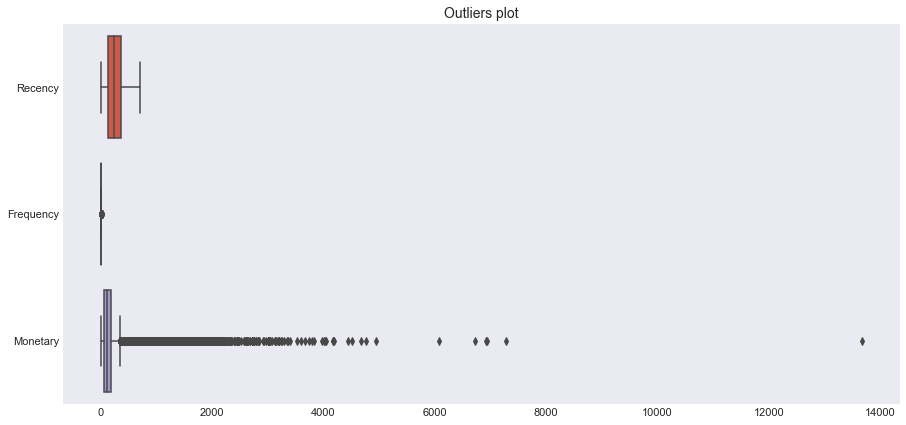

In [60]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (11, 9)
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = RFM, orient='h')
plt.title('Outliers plot', fontsize = 14)
plt.show()

So, here we can see outliers in Frequency and monetary fields, they should be dropped and analysed separately.

### Frequency distribution

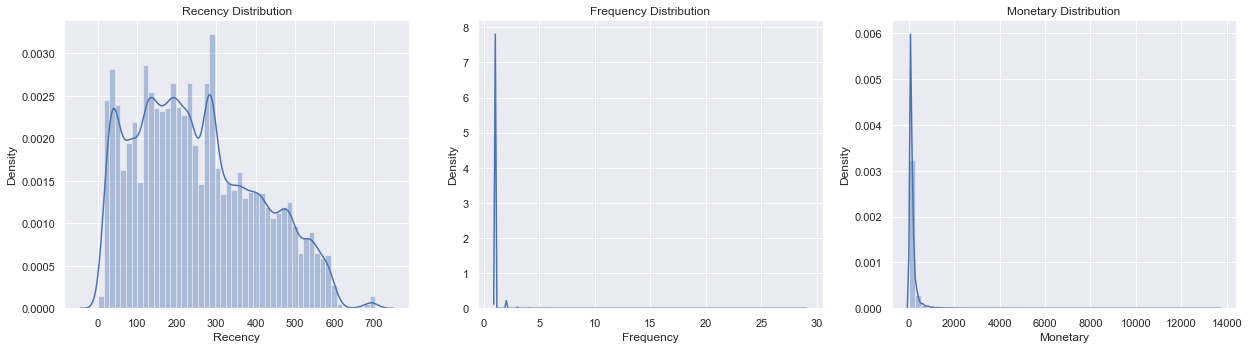

In [61]:
sns.set(rc={"figure.figsize": (21, 18)})
x1 = RFM["Recency"]
x2 = RFM["Frequency"]
x3 = RFM["Monetary"]

subplot(3,3,1)
ax = sns.distplot(x1)
plt.title("Recency Distribution")

subplot(3,3, 2)
ax = sns.distplot(x2, rug=False, hist=False)
plt.title("Frequency Distribution")

subplot(3,3,3)
ax = sns.distplot(x3, vertical=False)
plt.title("Monetary Distribution")

plt.show()

**Distributions Insights:**

1.***Recency Distribution***- Distribution in Recency is not highly skewed but it can be considered as normally distributed though we have deal with some outliers in the data.

2.***Frequency Distribution***- Distribution in Frequency is totally skewed to left that means most frequency values ranges btw 0 to 5. To make it normally distributed we have to consider the frequencies greater than 5.

3.***Monetary Distribution***- Distribution of Monetary group is also highly skewd to left that means alot monetary values ranges btw 0-1800 and there are alot of outliers we should deal with in this group.

**Analysing the Frequency group**

In [62]:
RFM['Frequency'].value_counts(normalize=True)*100

1     97.025333
2      2.395093
3      0.303099
4      0.108542
5      0.053247
6      0.035839
7      0.028671
8      0.010240
12     0.008192
11     0.008192
9      0.007168
10     0.003072
13     0.003072
14     0.002048
15     0.002048
19     0.002048
21     0.001024
22     0.001024
26     0.001024
29     0.001024
Name: Frequency, dtype: float64

From now we gonna considering the frequency greater than 5

In [63]:
RFM["Frequency"].apply(lambda x: "less or equal to 5" if x<=5 else "greater than 5")\
                                                            .value_counts(normalize=True)*100

less or equal to 5    99.885314
greater than 5         0.114686
Name: Frequency, dtype: float64

So, if we dropping the frequencies value greater than 5 that means we are dropping only 0.11% of records.

In [64]:
RFM = RFM[RFM['Frequency'] <= 5]

**Analysing Monetary Group**

In [65]:
RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    97546.000000
mean       159.780566
std        218.510326
min          0.000000
25%         61.880000
50%        105.280000
75%        176.255000
90%        305.680000
95%        446.215000
99%       1048.570000
max      13664.080000
Name: Monetary, dtype: float64

Here, we are selecting monetary range to 95% the above values will be dropped

<AxesSubplot:title={'center':'Distribution of Monetary < 95%'}, xlabel='Monetary', ylabel='Density'>

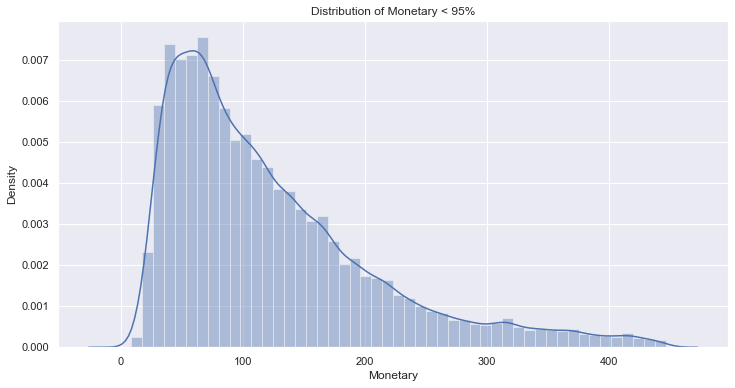

In [66]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(RFM[RFM['Monetary']<447].Monetary)

In [67]:
RFM = RFM[RFM['Monetary'] < 447]

**RFM groups**

I have used quantiles for assigning scores for **Recency and Monetary.**

groups are 0-33, 33-66, 66-100 quantiles

For **Frequency** I have decided to group them by hand

score=1 if the frequency value is 1

otherwise, the score will be 2

In [69]:
RFM["R_score"] = pd.qcut(RFM["Recency"], 3, labels=[1, 2, 3]).astype(str)
RFM["M_score"] = pd.qcut(RFM["Monetary"], 3, labels=[1, 2, 3]).astype(str)
RFM["F_score"] = RFM["Frequency"].apply(lambda x: "1" if x==1 else "2")

RFM["RFM_score"] = RFM["R_score"] + RFM["M_score"] + RFM["F_score"]

In [70]:
RFM.head()

,Recency,Frequency,Monetary,R_score,M_score,F_score,RFM_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,2,2,1,221
000161a058600d5901f007fab4c27140,420,1,67.41,3,1,1,311
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,3,3,1,331
0002414f95344307404f0ace7a26f1d5,389,1,179.35,3,3,1,331
000379cdec625522490c315e70c7a9fb,161,1,107.01,1,2,1,121


**CORE - '123'** - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients

**GONE** - '311', '312', '313' - gone, one-timers - those clients are probably gone;

**ROOKIE** - '111', '112', '113' - just have joined - new clients that have joined recently

**WHALES**- '323', '213', '223 - most revenue generating - whales that generate revenue

**LOYAL** - '221', '222', '321', '322' - loyal users

**REGULAR** - '121', '122', '211', '212', - average users - just regular customers that don't stand out

In [71]:
#assigning segments

def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

In [72]:
RFM["segments"] = RFM["RFM_score"].apply(segment)

In [74]:
round(RFM["segments"].value_counts(normalize=True)*100, 2)

Regular    55.65
Loyal      22.32
Gone       11.10
Rookies    10.92
Name: segments, dtype: float64

In [75]:
segmentwise = RFM.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Gone,433.899028,1.045384,47.860816,10290
Loyal,333.850590,1.039830,100.900992,20688
Regular,212.599977,1.032514,162.123485,51577
Rookies,87.686358,1.032698,47.928899,10123


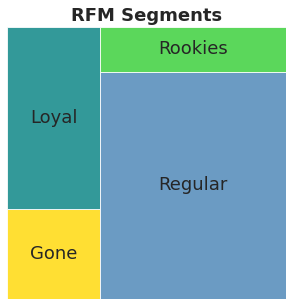

In [79]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(5, 5)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

From above plot we can get clear view on customers types in olist store:

In store regular customers(avg users) are high in number(55.65%).

Loyal customers(22.32%) which is good sign.

Gone customers(11.10%) are gone so we don't need to concentrate on them.

Remaining are Rookies(10.92%) who are new customers.

Here we have concentrate and keep efforts on regular and rookies type of customers, Store should give them some more offers or benificals etc..to convert them as loyal customers.

And we should loyal tothe users who are loyal to the store. So we have to keep on giving them good offers to stay them loyal.


**Reference**: https://www.kaggle.com/alpamys/rfm-cohort-analysis